In [1]:
# ---- Reproducibility
import random
import torch

#seed = 1234
#random.seed(seed)
#torch.manual_seed(seed)
#if torch.cuda.is_available():
#    torch.cuda.manual_seed_all(seed)


In [2]:


# ---- Parameters
n, p = 50, 40
noise_std = 0.1

# (Optional) choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
u = torch.rand(n, dtype=torch.float64, device=device)          # length n
v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

noisy_matrix = rank_1_matrix + noise

# ---- Print (move to CPU for readability if needed)
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix.cpu().numpy())

print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix.cpu().numpy())


Rank-1 Matrix (Outer Product):
[[0.04986468 0.2192129  0.53964378 ... 0.06915607 0.06721996 0.0133113 ]
 [0.05494211 0.2415341  0.59459262 ... 0.07619784 0.07406458 0.01466672]
 [0.00359149 0.01578876 0.03886772 ... 0.00498095 0.0048415  0.00095874]
 ...
 [0.0392444  0.17252451 0.42470939 ... 0.05442708 0.05290332 0.01047624]
 [0.03457207 0.15198422 0.37414466 ... 0.04794714 0.04660479 0.00922896]
 [0.03511417 0.15436738 0.38001137 ... 0.04869896 0.04733557 0.00937368]]

Noisy Matrix (with Homoscedastic Noise):
[[-3.54312050e-02  4.39355005e-01  3.62974359e-01 ... -4.12708039e-02
   6.13476932e-04  1.60188586e-02]
 [ 9.64712197e-02  4.59701565e-02  7.20823084e-01 ...  1.58681278e-01
  -2.66546136e-02  4.17514020e-02]
 [ 8.64578002e-02  5.77236813e-02 -6.24486087e-02 ... -3.61343537e-02
  -4.15736754e-02 -8.73324040e-02]
 ...
 [ 1.23271559e-01  2.96274630e-02  5.34618842e-01 ... -1.46873659e-02
  -3.77002325e-02  3.50415354e-02]
 [-5.54030423e-02  1.31917408e-01  4.77561803e-01 ...  2.1

In [3]:
import sys
import os
import matplotlib.pyplot as plt
from cebmf_torch import cEBMF

In [4]:
mycebmf=  cEBMF(data= noisy_matrix, prior_F="point_exp",
                prior_L="point_exp") 

 

In [5]:
mycebmf.initialize()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])

tensor([ 0.0556, -0.1223,  0.0611,  0.0016,  0.3783, -0.1283, -0.2019,  0.1107,
         0.1903,  0.1230,  0.1126,  0.0516,  0.0246,  0.0916, -0.0108, -0.1917,
        -0.0145,  0.0746,  0.2451, -0.1539,  0.1217,  0.0246, -0.2071, -0.0502,
         0.1626, -0.1010,  0.5232, -0.0273,  0.0587,  0.0727,  0.2037, -0.5502,
        -0.3161, -0.0502, -0.3114, -0.0188,  0.0415,  0.1968, -0.0461,  0.1531,
        -0.0761,  0.1136, -0.2692, -0.1142, -0.0254, -0.2320, -0.0289, -0.1834,
         0.0766,  0.2618])
tensor([ 0.2076,  0.0616, -0.1093,  0.0750,  0.2363, -0.1821,  0.1629, -0.1024,
         0.0308, -0.3827, -0.2624, -0.0385,  0.0338,  0.0100,  0.1502,  0.0758,
         0.1566,  0.1074, -0.3099,  0.1067,  0.1973,  0.1500,  0.2731, -0.0518,
        -0.0475, -0.2996, -0.1001, -0.0497,  0.0731,  0.0266,  0.1966, -0.0283,
        -0.0921,  0.2692, -0.1102,  0.1034,  0.0322,  0.0669,  0.1162, -0.0853])


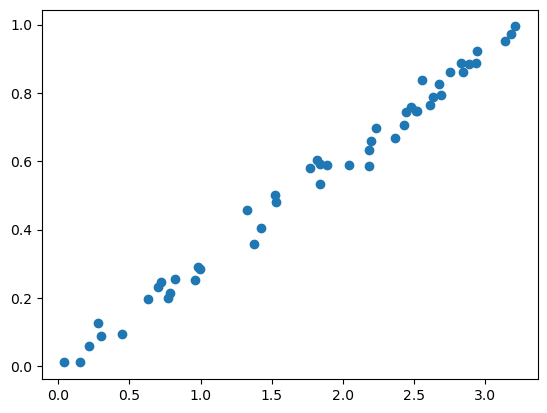

In [6]:
plt.scatter( mycebmf.L[:,0],u)

In [7]:
mycebmf.iter_once()
mycebmf.update_fitted_value()
import numpy as np
K=0
mycebmf.Y_fit 

5


tensor([[1.3363e-03, 5.0069e-04, 1.9743e-04,  ..., 7.8489e-04, 3.7467e-03,
         5.9360e-04],
        [5.1464e-04, 1.3115e-03, 2.5079e-04,  ..., 3.1244e-03, 1.3025e-02,
         2.2985e-04],
        [2.3121e-03, 4.0613e-03, 8.0486e-04,  ..., 9.5169e-03, 3.9222e-02,
         8.3816e-04],
        ...,
        [1.8443e-04, 2.6412e-04, 5.3209e-05,  ..., 6.1268e-04, 2.4933e-03,
         5.7972e-05],
        [1.8149e-03, 6.6672e-04, 2.9659e-04,  ..., 9.4862e-04, 5.2421e-03,
         9.6995e-04],
        [1.7046e-02, 3.2486e-03, 1.2035e-03,  ..., 4.3611e-03, 7.4312e-03,
         3.1430e-03]])

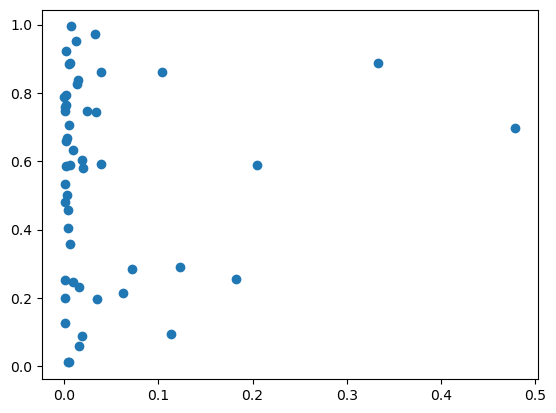

In [8]:
plt.scatter( mycebmf.L[:,0],u)

4


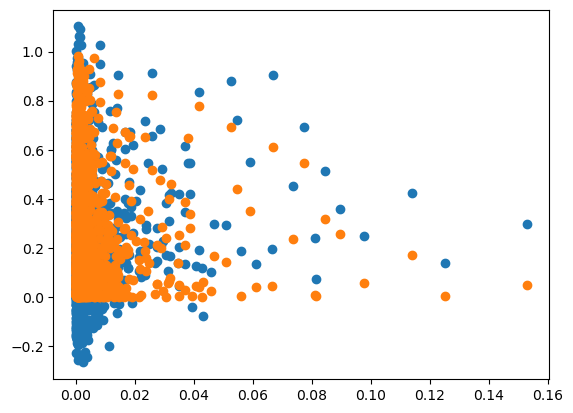

In [9]:
mycebmf.iter_once()  
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

In [10]:
mycebmf.fit()

CEBMFResult(L=tensor([[2.5474],
        [2.9376],
        [0.2150],
        [3.2046],
        [2.9280],
        [2.6039],
        [1.5214],
        [3.1721],
        [2.8388],
        [2.7485],
        [2.4360],
        [2.6677],
        [0.7174],
        [2.5109],
        [1.3691],
        [0.9565],
        [2.8226],
        [0.2925],
        [0.8156],
        [2.6826],
        [1.8345],
        [2.1736],
        [2.4688],
        [1.3180],
        [0.9923],
        [1.5204],
        [2.2252],
        [0.0956],
        [0.6930],
        [1.8133],
        [0.9747],
        [2.6261],
        [0.2727],
        [1.4155],
        [1.8345],
        [1.8840],
        [3.1336],
        [0.4396],
        [0.1590],
        [0.7797],
        [2.3620],
        [0.6256],
        [2.5083],
        [2.1764],
        [2.4191],
        [0.7677],
        [2.8773],
        [2.1865],
        [1.7604],
        [2.0368]]), F=tensor([[0.0179],
        [0.0724],
        [0.1927],
        [0.1032],
        [0

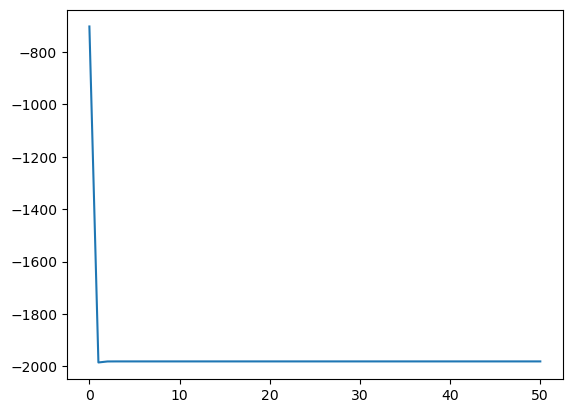

In [11]:
plt.plot(mycebmf.obj)

tensor(0.2258, dtype=torch.float64)

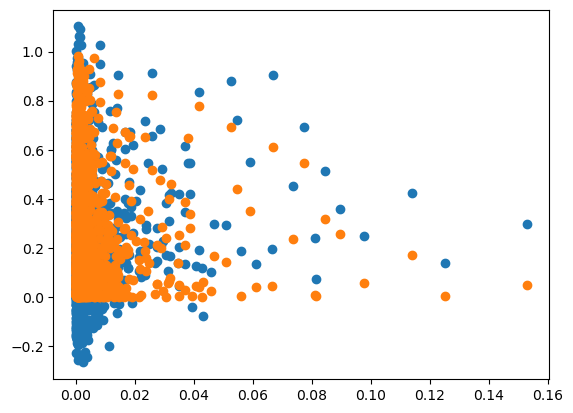

In [12]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)

In [ ]:
results =[]
for i in range(50):
    # Parameters
    n, p = 50, 40
    noise_std = 0.1

# (Optional) choose device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
    u = torch.rand(n, dtype=torch.float64, device=device)          # length n
    v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
    rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
    noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

    noisy_matrix = rank_1_matrix + noise

 
# Add homoscedastic Gaussian noise (constant variance across the matrix)
    mycebmf=  cEBMF(data= noisy_matrix,prior_L="point_exp",
                    prior_F="point_exp") 
    mycebmf.initialize()
    mycebmf.fit()
    
    mycebmf.update_fitted_value()
    
    rr = torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)
    results.append( rr)
 

5
2
5
4
5
4
5
3
5
5
2
5
2
5
4
5
4
5
3
5
2
5
4
5
5
3


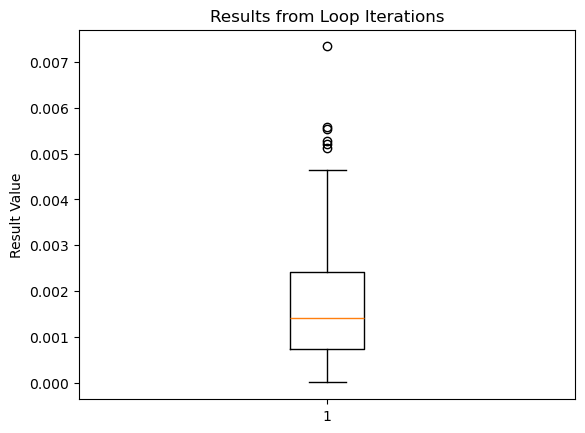

In [ ]:
plt.boxplot(results)
plt.title("Results from Loop Iterations")
plt.ylabel("Result Value")
plt.show()

In [ ]:
res= np.asarray(results)
np.mean(res )

0.0017063547087677897

In [ ]:
mycebmf.obj

[498.4504699707031,
 -894.3434448242188,
 -1897.7318115234375,
 -2013.838623046875,
 -2020.5509033203125,
 -2020.8548583984375,
 -2020.8681640625,
 -2020.868896484375,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.8690185546875,
 -2020.86901855468